## Classification on Cancer Data

The dataset we will be working is the Breast Cancer Wisconsin Diagnostic Database. 

The dataset includes various information about breast cancer tumors, as well as classification labels of malignant or benign. 

The dataset has 569 instances, or data, on 569 tumors and includes information on 30 attributes, or features, such as the radius of the tumor, texture, smoothness, and area.

A benign tumor is not a cancerous tumor. Unlike cancer tumors, a non cancerous tumor is unable to spread throughout the body. 

If your doctor determines that you have a malignant tumor, that means the mass is cancerous. The word malignant is Latin for “badly born.” 

This type of tumor has the ability to multiply uncontrollably, to metastasize (spread) to various parts of the body and invade surrounding tissue.


In [35]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
data1=pd.read_csv('cancer.csv')

In [36]:
data1.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
data1=data1.drop(['id'],axis=1)

In [38]:
data1.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
data1.diagnosis.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [40]:
data1['diagnosis'].replace(['M','B'],['Malignant','Benign'],inplace=True)

In [41]:
data1.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
#Get summary of parameters
x=data1.loc[:, ['radius_mean','area_mean','smoothness_mean']]

In [43]:
x.describe()

,radius_mean,area_mean,smoothness_mean
count,569.000000,569.000000,569.000000
mean,14.127292,654.889104,0.096360
std,3.524049,351.914129,0.014064
min,6.981000,143.500000,0.052630
25%,11.700000,420.300000,0.086370
50%,13.370000,551.100000,0.095870
75%,15.780000,782.700000,0.105300
max,28.110000,2501.000000,0.163400


In [44]:
x=data1.iloc[:,1:31]
y=data1.iloc[:,0]

In [45]:
x.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
y.head(5)

0    Malignant
1    Malignant
2    Malignant
3    Malignant
4    Malignant
Name: diagnosis, dtype: object

In [47]:
data1['diagnosis'].replace(['Malignant','Benign'],[1,0],inplace=True)

In [48]:
data1.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
#Apply normalization to rescale the features to a standard range of values.
#Normalize the numeric variables from column2 to column 31 in the dataframe
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [50]:
x['area_mean'].describe()

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area_mean, dtype: float64

In [51]:
#Splitting the dataset into Training set and Test set
#from sklearn import cross_validation, neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [52]:
x_train.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
461,27.420,26.27,186.90,2501.0,0.10840,0.1988,0.36350,0.16890,0.2061,0.05623,...,36.04,31.37,251.20,4254.0,0.1357,0.4256,0.6833,0.26250,0.2641,0.07427
440,10.970,17.20,71.73,371.5,0.08915,0.1113,0.09457,0.03613,0.1489,0.06640,...,12.36,26.87,90.14,476.4,0.1391,0.4082,0.4779,0.15550,0.2540,0.09532
219,19.530,32.47,128.00,1223.0,0.08420,0.1130,0.11450,0.06637,0.1428,0.05313,...,27.90,45.41,180.20,2477.0,0.1408,0.4097,0.3995,0.16250,0.2713,0.07568
68,9.029,17.33,58.79,250.5,0.10660,0.1413,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.1482,0.4365,1.2520,0.17500,0.4228,0.11750
355,12.560,19.07,81.92,485.8,0.08760,0.1038,0.10300,0.04391,0.1533,0.06184,...,13.37,22.43,89.02,547.4,0.1096,0.2002,0.2388,0.09265,0.2121,0.07188


In [53]:
y_train = y_train.astype('int')

y_test = y_test.astype('int')


In [54]:
x_test.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
541,14.470,24.99,95.81,656.4,0.08837,0.12300,0.100900,0.038900,0.1872,0.06341,...,16.220,31.73,113.50,808.9,0.1340,0.4202,0.40400,0.12050,0.3187,0.10230
158,12.060,12.74,76.84,448.6,0.09311,0.05241,0.019720,0.019630,0.1590,0.05907,...,13.140,18.41,84.08,532.8,0.1275,0.1232,0.08636,0.07025,0.2514,0.07898
538,7.729,25.49,47.98,178.8,0.08098,0.04878,0.000000,0.000000,0.1870,0.07285,...,9.077,30.92,57.17,248.0,0.1256,0.0834,0.00000,0.00000,0.3058,0.09938
417,15.500,21.08,102.90,803.1,0.11200,0.15710,0.152200,0.084810,0.2085,0.06864,...,23.170,27.65,157.10,1748.0,0.1517,0.4002,0.42110,0.21340,0.3003,0.10480
306,13.200,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.410,20.45,92.00,636.9,0.1128,0.1346,0.01120,0.02500,0.2651,0.08385


In [55]:
y_test.head(5)

541    0
158    0
538    0
417    1
306    0
Name: diagnosis, dtype: int32

# kNN Classifier

In [56]:
#Fitting Classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
#Predict on test data
y_pred=clf.predict(x_test)

In [58]:
print("Actual breast cancer : ")
print(y_test.values)

Actual breast cancer : 
[0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 0]


In [59]:
print("\nPredicted breast cancer : ")
print(y_pred)


Predicted breast cancer : 
[0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0]


In [60]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))


Accuracy score: 94.736842


In [61]:
print(confusion_matrix(y_test, y_pred)) 

[[83  2]
 [ 4 25]]


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        85
           1       0.93      0.86      0.89        29

    accuracy                           0.95       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.95      0.95      0.95       114



In [63]:
from sklearn.model_selection import cross_val_score
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [64]:
#Evaluation Metrics
from sklearn.model_selection import cross_val_score,cross_val_predict

In [65]:
#Print cross validation score for kNN
clf_acc = cross_val_score(clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
clf_acc

array([0.98026316, 0.97368421, 0.96688742])

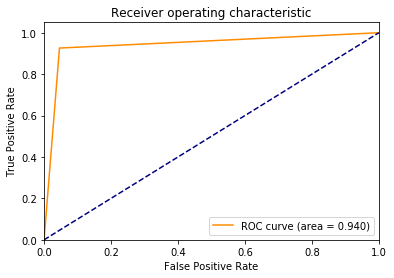

In [66]:
import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

#plt.figure()
plt.plot(fpr, tpr, color='darkorange', 
         label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [67]:
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))

ROC score : 91.926978



# Naive Bayes Classification

In [68]:
#Perform Naive Bayes Classification
#Fitting Classifier to the Training set
from sklearn.naive_bayes import GaussianNB
nb_classifier =GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [69]:
#Predict on test data
y_pred=nb_classifier.predict(x_test)

In [70]:
print("\nPredicted breast cancer : ")
print(y_pred)


Predicted breast cancer : 
[0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0]


In [71]:
print("Actual breast cancer : ")
print(y_test.values)

Actual breast cancer : 
[0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 0]


In [72]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

In [73]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))


Accuracy score: 94.736842


In [74]:
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))

Recall score : 79.310345


In [75]:
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))

ROC score : 89.655172



In [76]:
print(confusion_matrix(y_test, y_pred)) 

[[85  0]
 [ 6 23]]


 sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=’warn’, n_jobs=None, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’, error_score=’raise-deprecating’)

Evaluate a score by cross-validation



n_jobs : int or None, optional (default=None)
The number of CPUs to use to do the computation. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. 

In [77]:
nb_acc = cross_val_score(nb_classifier, x_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
nb_acc

array([0.92763158, 0.94078947, 0.94701987])

In [78]:
#Predict the probability of each test data point Get the probability distribution
probas = clf.predict_proba(x_test)

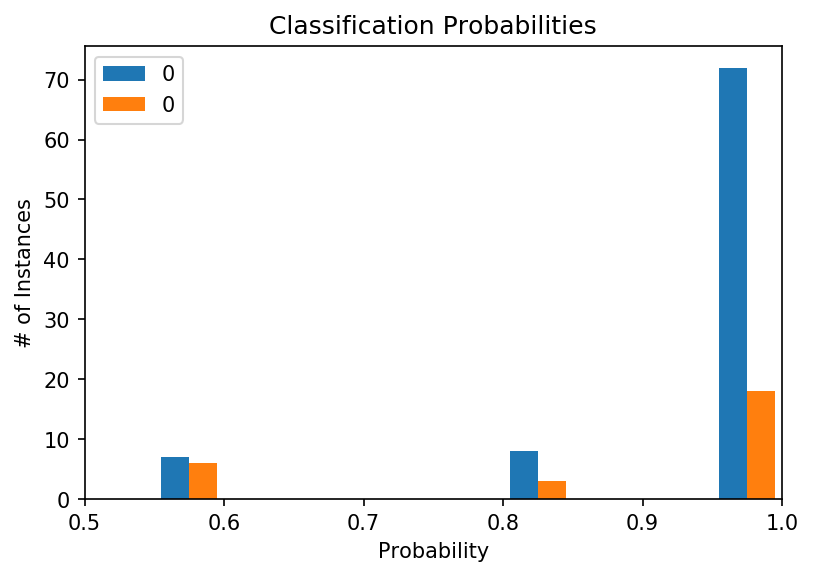

In [79]:
#Visualize the probabilities plot
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(y_test)
plt.show()

# Decision Tree Classifier

In [80]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

#Print cross validation score for Decision Tree Calssifier
dtc_clf_acc = cross_val_score(dtc_clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)

dtc_proba = cross_val_predict(dtc_clf, x_train_std, y_train, cv=3, method='predict_proba')
dtc_clf_scores = dtc_proba[:, 1]

In [81]:
#Predict on test data
y_pred=dtc_clf.predict(x_test)

In [82]:
print("Actual breast cancer : ")
print(y_test.values)

Actual breast cancer : 
[0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 0]


In [83]:
print("\nPredicted breast cancer : ")
print(y_pred)


Predicted breast cancer : 
[1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0]


In [84]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 94.736842
Recall score : 93.103448
ROC score : 94.198783

[[81  4]
 [ 2 27]]


# Random Forest Calssifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3, random_state=0)
rmf_clf = rmf.fit(x_train, y_train)

In [86]:
#Print cross validation score for Random Forest Calssifier
rmf_clf_acc = cross_val_score(rmf_clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf_clf, x_train_std, y_train, cv=3, method='predict_proba')
rmf_clf_scores = rmf_proba[:, 1]

In [87]:
#Predict on test data
y_pred=rmf.predict(x_test)

In [88]:
print("Actual breast cancer : ")
print(y_test.values)

Actual breast cancer : 
[0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 0]


In [89]:
print("\nPredicted breast cancer : ")
print(y_pred)


Predicted breast cancer : 
[0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0]


In [90]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 96.491228
Recall score : 86.206897
ROC score : 93.103448

[[85  0]
 [ 4 25]]
